In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [4]:
mvp = pd.read_csv("Data/AllPlayerData.csv")
mvp = mvp.drop("Table Name", axis = 1)
mvp
mvp_2020 = mvp.loc[mvp["Season"] == "2019-20"]
mvp_2020

,Player,PlayerID,Pos,Season,Tm,2P,2P%,2PA,3P,3P%,...,GS,MP,ORB,PF,PTS,Rk,STL,TOV,TRB,MVP
11080,Steven Adams,adamsst01,C,2019-20,OKC,261,0.593,440,1,0.333,...,58,1564,196,111,633,1,50,86,543,0
11081,Bam Adebayo,adebaba01,PF,2019-20,MIA,407,0.576,706,1,0.077,...,65,2235,165,164,1053,2,78,185,683,0
11082,LaMarcus Aldridge,aldrila01,C,2019-20,SAS,330,0.519,636,61,0.389,...,53,1754,103,128,1001,3,36,74,392,0
11083,Nickeil Alexander-Walker,alexani01,SG,2019-20,NOP,37,0.336,110,40,0.342,...,0,501,8,46,211,4,11,40,80,0
11084,Grayson Allen,allengr01,SG,2019-20,MEM,47,0.534,88,34,0.370,...,0,520,5,38,226,5,8,25,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,Thaddeus Young,youngth01,PF,2019-20,CHI,190,0.501,379,79,0.356,...,16,1591,94,134,659,516,92,102,315,0
11714,Trae Young,youngtr01,PG,2019-20,ATL,341,0.501,681,205,0.361,...,60,2120,32,104,1778,517,65,289,255,0
11715,Cody Zeller,zelleco01,C,2019-20,CHO,233,0.577,404,18,0.240,...,39,1341,160,140,642,518,40,75,411,0
11716,Ante Žižić,zizican01,C,2019-20,CLE,41,0.569,72,0,0.000,...,0,221,18,27,96,519,7,10,66,0


In [8]:
target = mvp["MVP"]
target_names = ["winner", "loser"]

In [9]:
data = mvp.drop(["Player", "PlayerID", "Pos", "Season", "Tm", "Rk", "MVP"], axis=1)
feature_names = data.columns
data.head()

,2P,2P%,2PA,3P,3P%,3PA,Age,AST,BLK,DRB,...,FTA,G,GS,MP,ORB,PF,PTS,STL,TOV,TRB
0,116,0.500,232,4,0.286,14,31,76,1,20,...,29,41,0,486,5,50,266,9,26,25
1,39,0.386,101,4,0.400,10,26,22,13,45,...,36,29,12,420,14,54,111,14,34,59
2,592,0.487,1216,12,0.188,64,24,250,77,560,...,531,81,81,3241,175,238,1663,90,231,735
3,14,0.350,40,4,0.250,16,27,36,0,25,...,18,26,0,227,0,29,52,16,25,25
4,222,0.421,527,17,0.370,46,23,62,5,101,...,150,65,24,1382,42,139,618,45,75,143


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

In [18]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

In [43]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.996
k: 3, Train/Test Score: 0.999/0.997
k: 5, Train/Test Score: 0.999/0.997
k: 7, Train/Test Score: 0.999/0.998
k: 9, Train/Test Score: 0.999/0.998
k: 11, Train/Test Score: 0.999/0.998
k: 13, Train/Test Score: 0.999/0.998
k: 15, Train/Test Score: 0.999/0.998
k: 17, Train/Test Score: 0.999/0.998
k: 19, Train/Test Score: 0.999/0.998


In [57]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.055422670045287475
RMSE value for k=  2 is: 0.053063166685593424
RMSE value for k=  3 is: 0.05002843332615361
RMSE value for k=  4 is: 0.046645127484966076
RMSE value for k=  5 is: 0.04570270453009524
RMSE value for k=  6 is: 0.04556558987503444
RMSE value for k=  7 is: 0.044788280937699786
RMSE value for k=  8 is: 0.043754570702246455
RMSE value for k=  9 is: 0.04426394900074082
RMSE value for k=  10 is: 0.04324704807539464
RMSE value for k=  11 is: 0.0437308935758616
RMSE value for k=  12 is: 0.044513124787489436
RMSE value for k=  13 is: 0.04480392171376311
RMSE value for k=  14 is: 0.0451175397595455
RMSE value for k=  15 is: 0.04550312844762486
RMSE value for k=  16 is: 0.04561919933671422
RMSE value for k=  17 is: 0.04535668898632185
RMSE value for k=  18 is: 0.0454846048855108
RMSE value for k=  19 is: 0.04526286547292342
RMSE value for k=  20 is: 0.04563731483248608


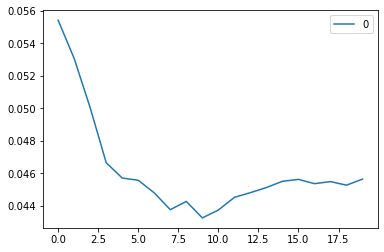

In [60]:
curve = pd.DataFrame(rmse_val) 
curve.plot()

## 9 appears to be the best value for k

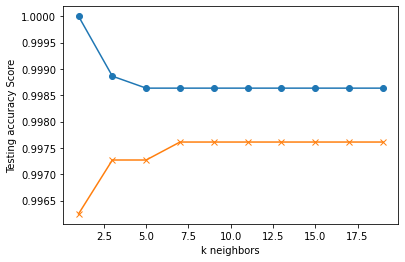

In [54]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [59]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.4f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.9976


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [68]:
X = mvp.drop(["Player", "PlayerID", "Pos", "Season", "Tm", "Rk", "MVP"], axis=1)
Xx = mvp_2020.drop(["Player", "PlayerID", "Pos", "Season", "Tm", "Rk", "MVP"], axis=1)
y = mvp["MVP"]
y = y.values.reshape(-1,1)

In [69]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler

X_scaler1 = StandardScaler().fit(X_train1)
y_scaler1 = StandardScaler().fit(y_train1)

In [72]:
X_train_scaled1 = X_scaler1.transform(X_train1)
X_test_scaled1 = X_scaler1.transform(X_test1)
Xx_test_scaled = X_scaler.transform(Xx)
y_train_scaled1 = y_scaler1.transform(y_train1)
y_test_scaled1 = y_scaler1.transform(y_test1)

In [77]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler_rf = MinMaxScaler().fit(X_train1)
X_train_scaled_rf = X_scaler.transform(X_train1)
X_test_scaled_rf = X_scaler.transform(X_test1)
Xx_test_scaled_rf = X_scaler.transform(Xx)

label_encoder = LabelEncoder()
label_encoder.fit(y_train1)
encoded_y_train = label_encoder.transform(y_train1)
encoded_y_test = label_encoder.transform(y_test1)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled_rf, encoded_y_train)

print(f"Training Data Score: {rf.score(X_train_scaled_rf, encoded_y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled_rf, encoded_y_test)}")

C:\Users\ricks\AppData\Local\Continuum\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Data Score: 1.0
Testing Data Score: 0.9976109215017065


In [78]:
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [400, 700, 1000]
}
grid2 = GridSearchCV(estimator=rf, param_grid=param_grid, verbose=3)

grid2.fit(X_train_scaled_rf, encoded_y_train)

print(grid2.best_params_)
print(grid2.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=400, score=0.999, total=   6.6s
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV] .................... n_estimators=400, score=0.998, total=   5.9s
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.4s remaining:    0.0s


[CV] .................... n_estimators=400, score=0.998, total=   3.5s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.999, total=   5.2s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.999, total=   6.7s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.999, total=  10.5s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.998, total=   9.4s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.998, total=  10.2s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.999, total=  10.8s
[CV] n_estimators=700 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.6min finished


{'n_estimators': 400}
0.9986345532869334


In [80]:
# SVC Prediction
predictions = grid2.predict(Xx_test_scaled_rf)

In [81]:
found = 0
for i in range(len(predictions)):
    if predictions[i] == 1:
        found = 1
        print(i,mvp_2020.iloc[i,0])
if found == 0:
    print("No Candidates")

No Candidates


In [82]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_rf, encoded_y_train)
    train_score = knn.score(X_train_scaled_rf, encoded_y_train)
    test_score = knn.score(X_test_scaled_rf, encoded_y_test)
    #knn.fit(X_train_scaled, encoded_y_train)
    #train_score = knn.score(X_train_scaled,encoded_y_train)
    #test_score = knn.score(X_test_scaled, encoded_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled_rf, encoded_y_train)
print('Test Acc: %.3f' % knn.score(X_test_scaled_rf, encoded_y_test))
print(f"Training Data Score: {knn.score(X_train_scaled_rf, encoded_y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled_rf, encoded_y_test)}")


k: 1, Train/Test Score: 1.000/0.996
k: 3, Train/Test Score: 0.999/0.997
k: 5, Train/Test Score: 0.999/0.997
k: 7, Train/Test Score: 0.999/0.998
k: 9, Train/Test Score: 0.999/0.998
k: 11, Train/Test Score: 0.999/0.998
k: 13, Train/Test Score: 0.999/0.998
k: 15, Train/Test Score: 0.999/0.998
k: 17, Train/Test Score: 0.999/0.998
k: 19, Train/Test Score: 0.999/0.998
Test Acc: 0.998
Training Data Score: 0.9986345015930814
Testing Data Score: 0.9976109215017065


In [87]:
# KNN Predictions
predictions = knn.predict(Xx_test_scaled_rf)

In [89]:
for i in range(len(predictions)):
    if predictions[i] == 1:
        print(i,mvp_2020.iloc[i,0])

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(units=8, activation='relu', input_dim=26))
deep_model.add(Dense(units=8, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

deep_model.summary()

deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled_rf,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)


model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled_rf,y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 216       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________
Train on 8788 samples
Epoch 1/1000
8788/8788 - 2s - loss: 0.1378 - accuracy: 0.9986
Epoch 2/1000
8788/8788 - 1s - loss: 0.0186 - accuracy: 0.9986
Epoch 3/1000
8788/8788 - 0s - loss: 0.0113 - accuracy: 0.9986
Epoch 4/1000
8788/8788 - 1s - loss: 0.0087 - accuracy: 0.9986
Epoch 5/1000
8788/8788 - 0s - loss: 0.0079 - accuracy: 0.9986
Epoch 6/1000
8788/8788 - 1s - loss: 0.0073 - accuracy:

Epoch 119/1000
8788/8788 - 1s - loss: 0.0035 - accuracy: 0.9991
Epoch 120/1000
8788/8788 - 1s - loss: 0.0017 - accuracy: 0.9995
Epoch 121/1000
8788/8788 - 1s - loss: 0.0019 - accuracy: 0.9995
Epoch 122/1000
8788/8788 - 1s - loss: 0.0018 - accuracy: 0.9995
Epoch 123/1000
8788/8788 - 1s - loss: 0.0018 - accuracy: 0.9995
Epoch 124/1000
8788/8788 - 1s - loss: 0.0018 - accuracy: 0.9995
Epoch 125/1000
8788/8788 - 1s - loss: 0.0020 - accuracy: 0.9995
Epoch 126/1000
8788/8788 - 1s - loss: 0.0030 - accuracy: 0.9992
Epoch 127/1000
8788/8788 - 0s - loss: 0.0017 - accuracy: 0.9997
Epoch 128/1000
8788/8788 - 1s - loss: 0.0019 - accuracy: 0.9994
Epoch 129/1000
8788/8788 - 1s - loss: 0.0019 - accuracy: 0.9995
Epoch 130/1000
8788/8788 - 1s - loss: 0.0015 - accuracy: 0.9997
Epoch 131/1000
8788/8788 - 1s - loss: 0.0024 - accuracy: 0.9990
Epoch 132/1000
8788/8788 - 1s - loss: 0.0019 - accuracy: 0.9994
Epoch 133/1000
8788/8788 - 1s - loss: 0.0020 - accuracy: 0.9994
Epoch 134/1000
8788/8788 - 1s - loss: 0.

Epoch 244/1000
8788/8788 - 0s - loss: 3.7234e-04 - accuracy: 1.0000
Epoch 245/1000
8788/8788 - 1s - loss: 1.6204e-04 - accuracy: 1.0000
Epoch 246/1000
8788/8788 - 0s - loss: 1.6418e-04 - accuracy: 1.0000
Epoch 247/1000
8788/8788 - 0s - loss: 1.3864e-04 - accuracy: 1.0000
Epoch 248/1000
8788/8788 - 1s - loss: 3.1125e-04 - accuracy: 1.0000
Epoch 249/1000
8788/8788 - 1s - loss: 1.5489e-04 - accuracy: 1.0000
Epoch 250/1000
8788/8788 - 0s - loss: 0.0037 - accuracy: 0.9995
Epoch 251/1000
8788/8788 - 0s - loss: 0.0020 - accuracy: 0.9998
Epoch 252/1000
8788/8788 - 0s - loss: 1.5121e-04 - accuracy: 1.0000
Epoch 253/1000
8788/8788 - 0s - loss: 1.4412e-04 - accuracy: 1.0000
Epoch 254/1000
8788/8788 - 0s - loss: 1.1968e-04 - accuracy: 1.0000
Epoch 255/1000
8788/8788 - 1s - loss: 1.1173e-04 - accuracy: 1.0000
Epoch 256/1000
8788/8788 - 1s - loss: 5.0926e-04 - accuracy: 0.9999
Epoch 257/1000
8788/8788 - 0s - loss: 2.1897e-04 - accuracy: 1.0000
Epoch 258/1000
8788/8788 - 0s - loss: 0.0051 - accuracy:

Epoch 366/1000
8788/8788 - 1s - loss: 2.6667e-05 - accuracy: 1.0000
Epoch 367/1000
8788/8788 - 1s - loss: 2.6212e-05 - accuracy: 1.0000
Epoch 368/1000
8788/8788 - 1s - loss: 2.5834e-05 - accuracy: 1.0000
Epoch 369/1000
8788/8788 - 1s - loss: 2.5101e-05 - accuracy: 1.0000
Epoch 370/1000
8788/8788 - 1s - loss: 2.3553e-05 - accuracy: 1.0000
Epoch 371/1000
8788/8788 - 1s - loss: 2.3825e-05 - accuracy: 1.0000
Epoch 372/1000
8788/8788 - 1s - loss: 2.2072e-05 - accuracy: 1.0000
Epoch 373/1000
8788/8788 - 0s - loss: 2.1230e-05 - accuracy: 1.0000
Epoch 374/1000
8788/8788 - 1s - loss: 2.0573e-05 - accuracy: 1.0000
Epoch 375/1000
8788/8788 - 1s - loss: 2.0193e-05 - accuracy: 1.0000
Epoch 376/1000
8788/8788 - 1s - loss: 0.0013 - accuracy: 0.9995
Epoch 377/1000
8788/8788 - 1s - loss: 0.0051 - accuracy: 0.9985
Epoch 378/1000
8788/8788 - 1s - loss: 4.7745e-04 - accuracy: 0.9999
Epoch 379/1000
8788/8788 - 1s - loss: 1.1808e-04 - accuracy: 1.0000
Epoch 380/1000
8788/8788 - 1s - loss: 3.3067e-05 - accur

8788/8788 - 1s - loss: 0.0022 - accuracy: 0.9994
Epoch 488/1000
8788/8788 - 1s - loss: 7.5188e-04 - accuracy: 0.9997
Epoch 489/1000
8788/8788 - 1s - loss: 2.2034e-05 - accuracy: 1.0000
Epoch 490/1000
8788/8788 - 1s - loss: 1.2044e-05 - accuracy: 1.0000
Epoch 491/1000
8788/8788 - 1s - loss: 1.1146e-05 - accuracy: 1.0000
Epoch 492/1000
8788/8788 - 1s - loss: 1.0309e-05 - accuracy: 1.0000
Epoch 493/1000
8788/8788 - 1s - loss: 9.7421e-06 - accuracy: 1.0000
Epoch 494/1000
8788/8788 - 1s - loss: 9.2824e-06 - accuracy: 1.0000
Epoch 495/1000
8788/8788 - 1s - loss: 8.9034e-06 - accuracy: 1.0000
Epoch 496/1000
8788/8788 - 1s - loss: 8.6619e-06 - accuracy: 1.0000
Epoch 497/1000
8788/8788 - 1s - loss: 8.4647e-06 - accuracy: 1.0000
Epoch 498/1000
8788/8788 - 1s - loss: 8.1971e-06 - accuracy: 1.0000
Epoch 499/1000
8788/8788 - 1s - loss: 8.0188e-06 - accuracy: 1.0000
Epoch 500/1000
8788/8788 - 1s - loss: 8.0061e-06 - accuracy: 1.0000
Epoch 501/1000
8788/8788 - 1s - loss: 7.7702e-06 - accuracy: 1.0000

8788/8788 - 1s - loss: 2.7739e-06 - accuracy: 1.0000
Epoch 609/1000
8788/8788 - 1s - loss: 2.7158e-06 - accuracy: 1.0000
Epoch 610/1000
8788/8788 - 1s - loss: 2.7565e-06 - accuracy: 1.0000
Epoch 611/1000
8788/8788 - 1s - loss: 2.5864e-06 - accuracy: 1.0000
Epoch 612/1000
8788/8788 - 1s - loss: 2.7143e-06 - accuracy: 1.0000
Epoch 613/1000
8788/8788 - 1s - loss: 2.6836e-06 - accuracy: 1.0000
Epoch 614/1000
8788/8788 - 1s - loss: 2.4891e-06 - accuracy: 1.0000
Epoch 615/1000
8788/8788 - 1s - loss: 2.6301e-06 - accuracy: 1.0000
Epoch 616/1000
8788/8788 - 1s - loss: 2.5056e-06 - accuracy: 1.0000
Epoch 617/1000
8788/8788 - 1s - loss: 2.6385e-06 - accuracy: 1.0000
Epoch 618/1000
8788/8788 - 1s - loss: 2.1436e-06 - accuracy: 1.0000
Epoch 619/1000
8788/8788 - 1s - loss: 2.5322e-06 - accuracy: 1.0000
Epoch 620/1000
8788/8788 - 1s - loss: 2.2942e-06 - accuracy: 1.0000
Epoch 621/1000
8788/8788 - 1s - loss: 2.8174e-06 - accuracy: 1.0000
Epoch 622/1000
8788/8788 - 1s - loss: 0.0080 - accuracy: 0.9987

8788/8788 - 0s - loss: 5.8559e-06 - accuracy: 1.0000
Epoch 730/1000
8788/8788 - 0s - loss: 4.7509e-06 - accuracy: 1.0000
Epoch 731/1000
8788/8788 - 0s - loss: 3.9934e-06 - accuracy: 1.0000
Epoch 732/1000
8788/8788 - 0s - loss: 3.2217e-06 - accuracy: 1.0000
Epoch 733/1000
8788/8788 - 0s - loss: 2.7085e-06 - accuracy: 1.0000
Epoch 734/1000
8788/8788 - 0s - loss: 2.4165e-06 - accuracy: 1.0000
Epoch 735/1000
8788/8788 - 0s - loss: 2.1609e-06 - accuracy: 1.0000
Epoch 736/1000
8788/8788 - 0s - loss: 1.9919e-06 - accuracy: 1.0000
Epoch 737/1000
8788/8788 - 0s - loss: 1.8825e-06 - accuracy: 1.0000
Epoch 738/1000
8788/8788 - 0s - loss: 1.7823e-06 - accuracy: 1.0000
Epoch 739/1000
8788/8788 - 0s - loss: 1.7009e-06 - accuracy: 1.0000
Epoch 740/1000
8788/8788 - 0s - loss: 1.6421e-06 - accuracy: 1.0000
Epoch 741/1000
8788/8788 - 0s - loss: 1.5797e-06 - accuracy: 1.0000
Epoch 742/1000
8788/8788 - 0s - loss: 1.5213e-06 - accuracy: 1.0000
Epoch 743/1000
8788/8788 - 0s - loss: 1.4777e-06 - accuracy: 1.

Epoch 850/1000
8788/8788 - 1s - loss: 5.9668e-07 - accuracy: 1.0000
Epoch 851/1000
8788/8788 - 0s - loss: 5.8960e-07 - accuracy: 1.0000
Epoch 852/1000
8788/8788 - 0s - loss: 5.6850e-07 - accuracy: 1.0000
Epoch 853/1000
8788/8788 - 0s - loss: 5.5374e-07 - accuracy: 1.0000
Epoch 854/1000
8788/8788 - 0s - loss: 5.5522e-07 - accuracy: 1.0000
Epoch 855/1000
8788/8788 - 0s - loss: 5.2069e-07 - accuracy: 1.0000
Epoch 856/1000
8788/8788 - 0s - loss: 5.1368e-07 - accuracy: 1.0000
Epoch 857/1000
8788/8788 - 0s - loss: 1.0122e-06 - accuracy: 1.0000
Epoch 858/1000
8788/8788 - 0s - loss: 8.6659e-07 - accuracy: 1.0000
Epoch 859/1000
8788/8788 - 1s - loss: 0.0056 - accuracy: 0.9992
Epoch 860/1000
8788/8788 - 1s - loss: 0.0027 - accuracy: 0.9992
Epoch 861/1000
8788/8788 - 0s - loss: 1.3119e-05 - accuracy: 1.0000
Epoch 862/1000
8788/8788 - 0s - loss: 3.5498e-06 - accuracy: 1.0000
Epoch 863/1000
8788/8788 - 0s - loss: 2.7719e-06 - accuracy: 1.0000
Epoch 864/1000
8788/8788 - 0s - loss: 2.3501e-06 - accur

Epoch 971/1000
8788/8788 - 0s - loss: 4.3771e-07 - accuracy: 1.0000
Epoch 972/1000
8788/8788 - 0s - loss: 4.2847e-07 - accuracy: 1.0000
Epoch 973/1000
8788/8788 - 0s - loss: 4.2002e-07 - accuracy: 1.0000
Epoch 974/1000
8788/8788 - 1s - loss: 4.1182e-07 - accuracy: 1.0000
Epoch 975/1000
8788/8788 - 0s - loss: 4.0875e-07 - accuracy: 1.0000
Epoch 976/1000
8788/8788 - 0s - loss: 4.0462e-07 - accuracy: 1.0000
Epoch 977/1000
8788/8788 - 1s - loss: 4.0261e-07 - accuracy: 1.0000
Epoch 978/1000
8788/8788 - 1s - loss: 3.9709e-07 - accuracy: 1.0000
Epoch 979/1000
8788/8788 - 0s - loss: 3.9034e-07 - accuracy: 1.0000
Epoch 980/1000
8788/8788 - 0s - loss: 3.8584e-07 - accuracy: 1.0000
Epoch 981/1000
8788/8788 - 0s - loss: 3.7952e-07 - accuracy: 1.0000
Epoch 982/1000
8788/8788 - 0s - loss: 3.8111e-07 - accuracy: 1.0000
Epoch 983/1000
8788/8788 - 0s - loss: 3.6970e-07 - accuracy: 1.0000
Epoch 984/1000
8788/8788 - 1s - loss: 3.6667e-07 - accuracy: 1.0000
Epoch 985/1000
8788/8788 - 0s - loss: 3.5914e-07

In [95]:
ynew = deep_model.predict_classes(Xx_test_scaled_rf)
for i in range(len(Xx_test_scaled_rf)):
    if (ynew[i] == 1):
        print(i,"X=%s, Predicted=%s" % (Xx_test_scaled_rf[i], ynew[i]),mvp_2020.iloc[i,0])